In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

def reference(x): #la densité de référence à estimer
        return 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)



#Partie 1
#Question 1

#Uniform Kernel
#K(x) = 1/2 if x<1 and x>-1 else 0
def K1(x):
    return np.where((x < 1) & (x > -1), 1/2, 0)

#Triangular kernel
#K(x) = 1-|x| if x<1 and x>-1 else 0
def K2(x):
    return np.where((x < 1) & (x > -1), 1-np.abs(x), 0)
    
        
#Epanechnikov kernel
#K(x) = 3/4(1-x^2) if x<1 and x>-1 else 0
def K3(x):
    return np.where((x < 1) & (x > -1), 3/4*(1-x**2), 0)
        
#Gaussian kernel
#K(x) = 1/(sqrt(2*pi))*exp(-x^2/2)
def K4(x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)





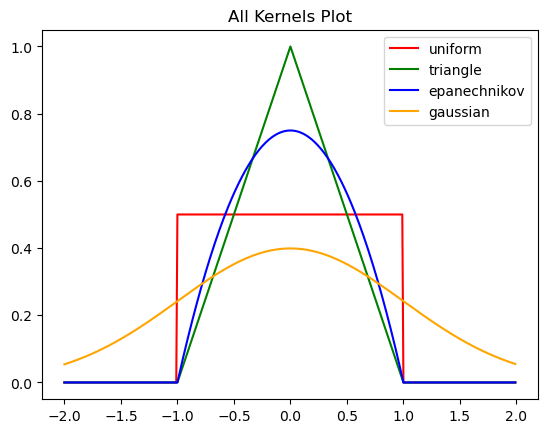

In [62]:


#Question 2
def AllplotK(step,xmin,xmax,col1,col2,col3,col4):

            """
            Plot all kernels in the same graph
            step: step between each point
            xmin: minimum value of x
            xmax: maximum value of x
            colors: list of colors for each kernel
            """
            plt.title('All Kernels Plot')
            colors = [col1, col2, col3, col4]
            kernels = [K1, K2, K3, K4]
            legends=['uniform', 'triangle', 'epanechnikov', 'gaussian']
            x = np.arange(xmin, xmax, step)
            for i in range(len(kernels)):
                plt.plot(x, kernels[i](x), colors[i], label = legends[i])
            plt.legend()
            plt.show()
     


AllplotK(0.01,-2,2,'r','g','b','orange')

In [52]:
#Question 3
#Generate a realization of the random sample X according to the standard
#Gaussian distribution of size n. (n is currently set to 100 in the script).
n=100
X= np.random.normal(0,1,n)
X

array([-1.44058159, -1.2999393 , -0.81868679, -0.56241114, -0.71111647,
        0.08393852,  1.74776522, -1.29266942,  0.91057665,  0.76396656,
        0.63152601,  0.01111486, -0.47458066, -0.64595714, -0.17328986,
        0.2458424 , -0.41017281, -0.26029545, -0.32042835, -1.20322776,
       -1.98473702, -0.70712328, -0.30120319,  1.52348599,  0.59508211,
        0.54180114, -0.10635635, -0.67623081, -1.89237256,  0.27846116,
        1.02295816, -1.03604472,  0.18460727,  0.39303275, -1.22955676,
       -2.05310397, -1.29150159,  2.2933865 ,  1.95675522, -0.90275359,
        0.06409315,  0.52943838, -2.15308676, -0.11542269, -0.17976207,
       -0.39217372, -0.02728206,  0.77731865, -0.37347857, -0.20809434,
       -1.72506508, -0.28988461, -0.4270429 ,  1.48401018,  0.58528601,
        0.92008963,  0.54570463, -0.02859533,  0.70402459, -0.72890275,
        1.76272907, -0.44532626,  1.08504801,  0.69943415, -0.4897793 ,
       -0.02032859, -0.28517647, -0.70320287,  1.62385642, -0.93

In [144]:

#Question 4
#write a function fhat that Estimates the density f(here the standard Gaussian, for a window h, at the point x for the kernel func)
#if x is an array, the function will return an array of the same size appliying the function over each element of x

def fhat(kernel,h,x,sample):
    return (1/len(sample))*sum(((1/h)*kernel((x-sample)/h)))

#X= np.random.normal(0,1,1000)
#arrange=np.arange(-2,2,0.01)

#fhat(K1,2,0.5,X)
print(reference(0))
fhat(K1,2,0,X)


0.3989422804014327


0.23875000000000002

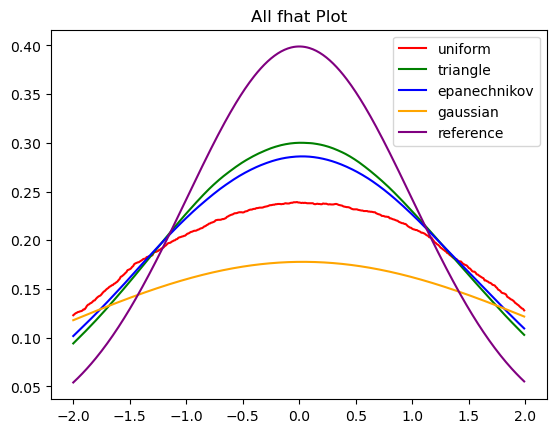

In [143]:
#Question 5
#The function below plots the estimated density fhat for a given kernel, a given window h and a given point x
#The function also plots the reference density f


def Allplotfhath2(xmin,xmax,step,col1,col2,col3,col4,colref,realization=X,title='All fhat Plot'):
    """
    xmin: minimum value of x
    xmax: maximum value of x
    step: step between each point
    colors: list of colors for each kernel
    """
    plt.title(title)
    colors = [col1, col2, col3, col4]
    kernels = [K1, K2, K3, K4]
    legends=['uniform', 'triangle', 'epanechnikov', 'gaussian']
    x = np.arange(xmin, xmax, step)
    for i in range(len(kernels)):
        x = np.arange(xmin, xmax, step)
        fhats = [fhat(kernels[i],2,p,realization) for p in x]
        plt.plot(x, fhats, colors[i], label = legends[i])
    plt.plot(x, reference(x), colref, label = 'reference')
    plt.legend()
    plt.show()

Allplotfhath2(-2,2,0.01,'r','g','b','orange','purple')


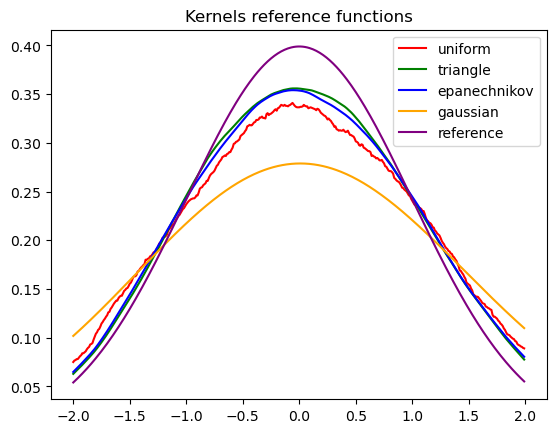

In [145]:

#Question 6
#The funciont Allplotfhath1 is the same as Allplotfhath2 but the windows size
#we use when calling fhat is 1 instead of 2

def Allplotfhath1(xmin,xmax,step,col1,col2,col3,col4,colref,realization=X,title='Kernels reference functions'):
    """
    xmin: minimum value of x
    xmax: maximum value of x
    step: step between each point
    colors: list of colors for each kernel
    """
    plt.title(title)
    colors = [col1, col2, col3, col4]
    kernels = [K1, K2, K3, K4]
    legends=['uniform', 'triangle', 'epanechnikov', 'gaussian']
    x = np.arange(xmin, xmax, step)
    for i in range(len(kernels)):
        fhats = [fhat(kernels[i],1,p,realization) for p in x]
        plt.plot(x, fhats, colors[i], label = legends[i])
    plt.plot(x, reference(x), colref, label = 'reference')
    plt.legend()
    plt.show()

Allplotfhath1(-2,2,0.01,'r','g','b','orange','purple')

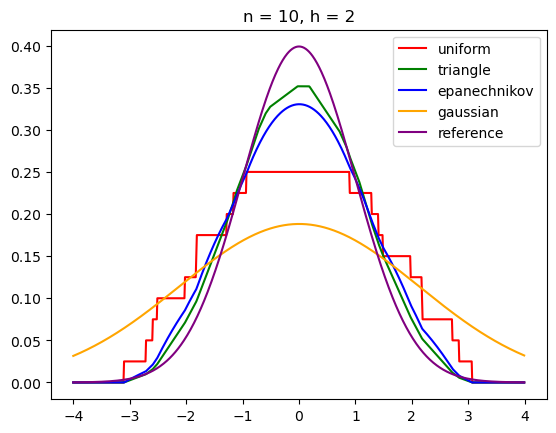

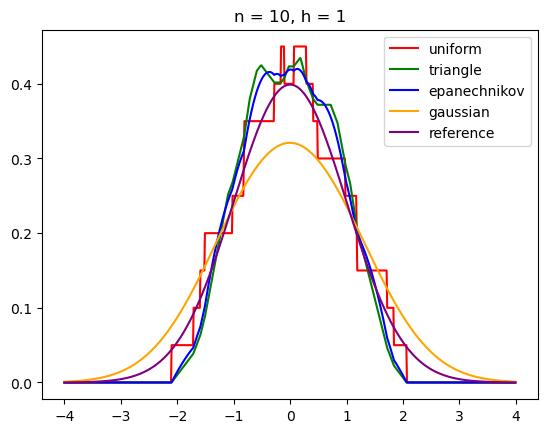

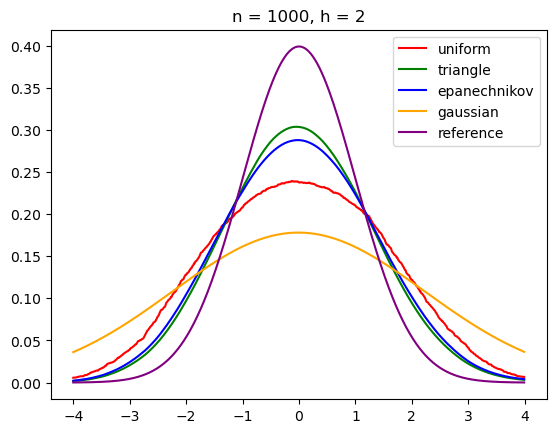

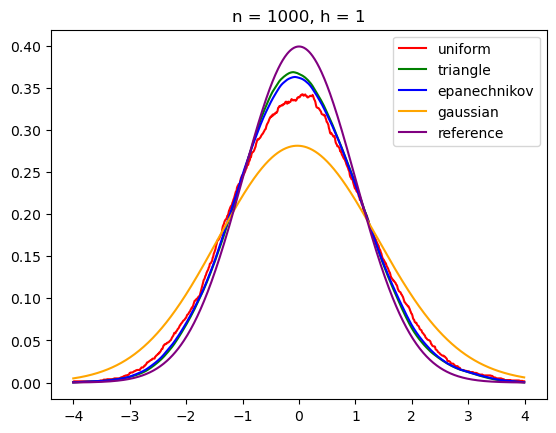

In [148]:
#Question 7

n10 = np.random.normal(0,1,10)
n100 = np.random.normal(0,1,100)
n1000 = np.random.normal(0,1,1000)

#We need to make four graphs. One using Allplotfhath1 and the other using Allplotfhath2
#each one on a different sample n10 and n1000. We will use the same colors for each
#kernel in each graph, so that we can compare them easily. And give a title to each graph
#like this: "n = 100, h = 2" For example


# Graph 1(n, h) =(10, 2)
# Graph 2(n, h) =(10, 1)
# Graph 3(n, h) =(1000, 2)
# Graph 3(n, h) =(1000, 1)



Allplotfhath2(-4,4,0.01,'r','g','b','orange','purple',realization=n10, title='n = 10, h = 2')
Allplotfhath1(-4,4,0.01,'r','g','b','orange','purple',realization=n10, title='n = 10, h = 1')
Allplotfhath2(-4,4,0.01,'r','g','b','orange','purple',realization=n1000, title='n = 1000, h = 2')
Allplotfhath1(-4,4,0.01,'r','g','b','orange','purple',realization=n1000, title='n = 1000, h = 1')




In [151]:

#Question 8

def SCE(kernel,h,f):
    """
    kernel: kernel function
    h: window size
    f: reference function
    """
    sample = np.random.normal(0,1,500)
    x = np.arange(-5, 5, 0.02)

    
    

    return  



500